# Scrape MyMovies Web Site

## Goal 

Obtain __two__ web pages:

* Cars
* Pirates of Carribean 5

Get the description of the movies and make a quick analysis about the content. 

* Compare the two movies, do they refer to the same topic? 
* Do they have topic in common?

## Libraries we need

* `bs4` (`BeautifulSoup module`)
* `requests` or `urllib2`

## How to do it?

1. Save two variables for the `urls`
2. Use the library `requests` to get the `html` to parse (? Get the useful information)
3. Use `BeautifulSoup` to the the *"soup"* to parse
4. Explore a bit the `html` and `BeautifulSoup` to understand how they work
5. Produce the Cloud of Word (link in Assignment 3, exercise 3) to get an idea of what's going on


In [1]:
# import useful libraries
import requests
from bs4 import BeautifulSoup

In [2]:
# Define url 
url1 = 'http://www.mymovies.it/film/2017/cars3/'
url2 = 'http://www.mymovies.it/film/2017/piratideicaraibi5/'

Perform a `get` request. __What it is?__

Basically, you are asking the server to give you something (so you `get` the information). In this particular case, we want to obtain the `html` of the pages of interest.

We create a function to get both the `html` and the `soup`.


In [15]:
def get_page(url):
    """Return the html to analyse.
    
    @url: url of the page"""

    # Make the requests and get html 
    html = requests.get(url).text
    
    # Get the soup
    soup = BeautifulSoup(html, 'html.parser')
    
    return soup

In [16]:
soup1 = get_page(url1)

### How to use the `soup`?

Reeeeaad the [documentation](https://www.crummy.com/software/BeautifulSoup/bs4/doc/).

We are interest in the body (`corpo`)!

Thus, we proceed like as follows.


In [ ]:
def get_body_to_process(soup):
    """@soup: outpur get_html"""
    
    # Get all the paragraph
    body = []
    for p in soup1.find_all('p', {'class':'corpo'}):
        print (p.text)
        body += [p.text]
        
    
    # Get body to process: join the strings of the lists
    body_to_process = ''.join([str(b).strip() for b in body])
    
    return body_to_process

In [46]:
body = []
for p in soup1.find_all('p', {'class':'corpo'}):
    print (p.text)
    body += [p.text]


                                    
Saetta McQueen ha un nuovo rivale: Ã¨ Jackson Storm, un'auto da corsa di ultima generazione allenata su simulatori di gara avanzatissimi. Il consenso generale Ã¨ che per Saetta sia arrivata l'ora di appendere i pneumatici al chiodo e ritirarsi in buon ordine, andando a raggiungere le vecchie glorie del passato. Mai come in questo momento ha bisogno dei consigli del suo mentore Doc Hudson e dell'amicizia di Cricchetto e Sally: ma se questi ultimi gli sono vicini, Doc Ã¨ una presenza confinata nel cuore e nella memoria. Nuovi alleati perÃ² appariranno lungo la strada della rivincita, prima fra tutti Cruz Ramirez, una bravissima istruttrice che ha messo da parte il sogno di diventare pilota di gara perchÃ© tutti, a cominciare dal suo capo, l'hanno scoraggiata dal tentare.

                                

                                        
Al terzo episodio della saga, Cars 3 trova nuova linfa proprio nel personaggio femminile al centro (insiem

In [47]:
# We do a join on the list of paragraphs
body_to_process = ''.join([str(b).strip() for b in body])

# Let's see it!
body_to_process

'Saetta McQueen ha un nuovo rivale: Ã¨ Jackson Storm, un\'auto da corsa di ultima generazione allenata su simulatori di gara avanzatissimi. Il consenso generale Ã¨ che per Saetta sia arrivata l\'ora di appendere i pneumatici al chiodo e ritirarsi in buon ordine, andando a raggiungere le vecchie glorie del passato. Mai come in questo momento ha bisogno dei consigli del suo mentore Doc Hudson e dell\'amicizia di Cricchetto e Sally: ma se questi ultimi gli sono vicini, Doc Ã¨ una presenza confinata nel cuore e nella memoria. Nuovi alleati perÃ² appariranno lungo la strada della rivincita, prima fra tutti Cruz Ramirez, una bravissima istruttrice che ha messo da parte il sogno di diventare pilota di gara perchÃ© tutti, a cominciare dal suo capo, l\'hanno scoraggiata dal tentare.Al terzo episodio della saga, Cars 3 trova nuova linfa proprio nel personaggio femminile al centro (insieme a Saetta) della storia.In generale colpisce come tutti i personaggi femminili del film siano ben sviluppati,

## We need to pre-process the text, why?

* If I want to compute the frequency of a word, I don't want my program to distinguish between "ciao" and "CiAo". So, it's a good use to tranform all the characters in *lowercase*
* We don't want to analyse the *stopwords* (e.g. of, on, me, you, they, are, have etc.), common words that have not much impact on the analysis

And many other according to your objectives.

In [ ]:
def clean_body(body_to_process):
    """
    @body_to_process: list of words that need to be processed"""
    
    # Define the stopwords
    stop = stopwords.words('italian')
    
    # Clean each word
    cleaned_body = ' '.join([w.strip().lower() for w in body_to_process.split() if len(w) > 3 and w not in stop])
    
    
    return cleaned_body

In [53]:
# Usually in english we already have the list (which you can always modify)... also in italian!!

# Fantastic library for text analysis N(atural)L(anguage)T(ool)K(it)
from nltk.corpus import stopwords

stop = stopwords.words('italian')

# Let's take a look
stop[:10]

['ad', 'al', 'allo', 'ai', 'agli', 'all', 'agl', 'alla', 'alle', 'con']

In [72]:
# Clean the body dropping all the words which have 
cleaned_body = ' '.join([w.strip().lower() for w in body_to_process.split() if len(w) > 3 and w not in stop])

# What we have now
cleaned_body[:25]

'saetta mcqueen nuovo riva'

## Ready to visualize :-)

In [66]:
%matplotlib inline
from wordcloud import WordCloud

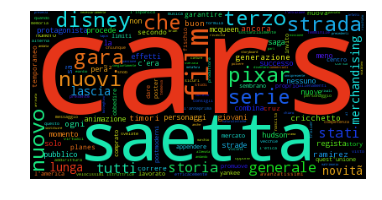

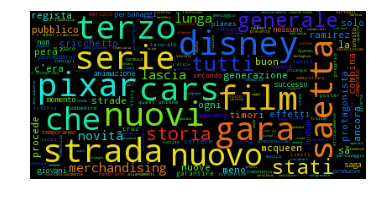

In [73]:
# Generate a word cloud image
wordcloud = WordCloud().generate(cleaned_body)

# Display the generated image:
# the matplotlib way:
import matplotlib.pyplot as plt
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

# lower max_font_size
wordcloud = WordCloud(max_font_size=40).generate(cleaned_body)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()